In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score

In [ ]:
basepath = 'drive/My Drive/CSE_575_Road_Condition_Classification_Project/Dataset/'

plain_dir = os.path.join(basepath, 'Training/Plain')
pothole_dir = os.path.join(basepath, 'Training/Pothole')
rocky_dir = os.path.join(basepath, 'Training/Rocky')
bumpy_dir = os.path.join(basepath, 'Training/Bumpy')

print("Total training Plain road images: ", len(os.listdir(plain_dir)))
print("Total training Pothole road images: ", len(os.listdir(pothole_dir)))
print("Total training Rocky road images: ", len(os.listdir(rocky_dir)))

plain_files = os.listdir(plain_dir)
print(plain_files[:10])

pothole_files = os.listdir(pothole_dir)
print(pothole_files[:10])


rocky_files = os.listdir(rocky_dir)
print(rocky_files[:10])


Total training Plain road images:  300
Total training Pothole road images:  300
Total training Rocky road images:  119
['160.grusvag-gardesgardar-ola-jennersten-ibl-33-902x492.jpg', '16.nhai-eyes-rs-5000-crore-from-roads-bidding.jpg', '83.slider07_wagdhari_ribbanpalli_20_tollway_plaza.JPG', '344.640px-Approaching-Yamuna01_Agra_Lucknow_Expressway_33198644271-1.jpg', '355.BRO-to-use-plastic-roads.jpeg', '8.d336c256e5e7464f8757216009a9be44.jpg', '155.Heavy_traffic_bad_roads_JF_TT.jpg', '137.380-road-Uttarakhand.jpg', '64.1540148417-3697.jpg', '30.highway-401-westbound-collectors-crash.jpg']
['pothole (476).jpg', 'pothole (52).jpg', 'pothole (2).jpeg', 'pothole (533).jpg', 'pothole (499).jpg', 'pothole (163).jpg', 'pothole (358).jpg', 'pothole (421).jpg', 'pothole (134).jpg', 'pothole (564).jpg']
['000021.jpg', '000016.jpg', '000007.jpg', '000011.jpg', '000059.jpg', '000058.jpg', '000062.jpg', '000051.jpg', '000063.jpg', '000061.jpg']


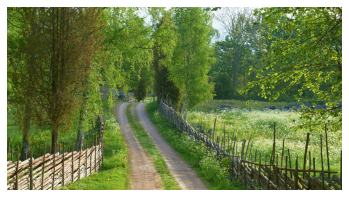

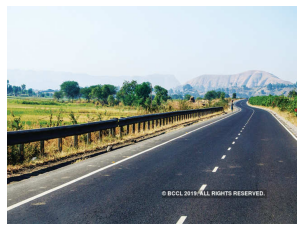

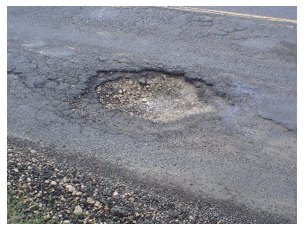

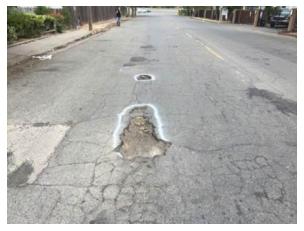

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

plain_images = [os.path.join(plain_dir, fname) for fname in plain_files[pic_index-2:pic_index]]
pothole_images = [os.path.join(pothole_dir, fname) for fname in pothole_files[pic_index-2:pic_index]]

for i, img_path in enumerate(plain_images+pothole_images):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

train_dir = os.path.join(basepath, 'Training/')
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=1
)

j=0

train_generator.reset()
X_train, y_train = next(train_generator)
for i in range(int(len(train_generator)/train_generator.batch_size)-1): #1st batch is already fetched before the for loop.
  img, label = next(train_generator)
  X_train = np.append(X_train, img, axis=0 )
  y_train = np.append(y_train, label, axis=0)
  j=j+1
print(X_train.shape, y_train.shape)

nsamples, nx, ny, nrgb = X_train.shape
X_train2 = X_train.reshape((nsamples,nx*ny*nrgb))

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

predict_dir = os.path.join(basepath, 'Predict/')
prediction_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

prediction_generator = prediction_datagen.flow_from_directory(
	predict_dir,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=1
)

print(type(prediction_generator))

print(prediction_generator.class_indices)

j=0

X_test, y_test = next(prediction_generator)
print(X_test,y_test)
for i in prediction_generator:
  if j>10:
    break
  X_test = np.append(X_test, i[0], axis=0 )
  y_test = np.append(y_test, i[1], axis=0)
  j = j+1

nsamples, nx, ny, nrgb = X_test.shape
print(nsamples, nx, ny, nrgb)
X_test2 = X_test.reshape((nsamples,nx*ny*nrgb))

print(len(X_test2[0]))

In [ ]:
from sklearn.linear_model import LogisticRegression

y_train2 = []
y_test2 = []

for i in y_train:
  s=""
  for j in range(3):
    s+=str(int(i[j]))
  y_train2.append(s)

y_train2 = np.array(y_train2)

for i in y_test:
  s=""
  for j in range(3):
    s+=str(int(i[j]))
  y_test2.append(s)

y_test2 = np.array(y_test2)
  
 
# y_train2.append()
print(len(y_train2))
print(len(y_test2))

718
12


In [ ]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train2, y_train)
y_pred = forest.predict(X_test2)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.667


In [ ]:
nb=MultinomialNB()
nb.fit(X_train2, y_train2)
y_pred = nb.predict(X_test2)
print('Accuracy: %.3f' % accuracy_score(y_test2, y_pred))

Accuracy: 0.417


In [ ]:
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train2, y_train)
y_pred = clf.predict(X_test2)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.667


In [ ]:
clf = DecisionTreeClassifier().fit(X_train2, y_train)
y_pred = clf.predict(X_test2)
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.583


In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train2, y_train2)

poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train2, y_train2)
poly_pred = poly.predict(X_test2)

rbf_pred = rbf.predict(X_test2)
poly_accuracy = accuracy_score(y_test2, poly_pred)
poly_f1 = f1_score(y_test2, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1))

Accuracy (Polynomial Kernel):  0.67
F1 (Polynomial Kernel):  0.72
